# NYC Car Accidents (2020)

## Goal: Analyze traffic dataset from [Kaggle](https://www.kaggle.com/mysarahmadbhat/nyc-traffic-accidents)

### Included in the dataset:
* Motor vehicle collisions reported by the New York City Police Department from January-August 2020. 


* Each record represents:

        Individual collision,
    
        Date, time and location of the accident (borough, zip code, street name, latitude/longitude), 
    
        Vehicles and victims involved,
    
        Contributing factors.

## Imports

In [72]:
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

import folium 
from folium.plugins import HeatMap

## Data prep

In [5]:
df = pd.read_csv("nyc_accidents_2020.csv")
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


### Set location

In [6]:
coord = df[["LATITUDE","LONGITUDE"]]

In [7]:
coord.head()

,LATITUDE,LONGITUDE
0,40.89210,-73.833760
1,40.69050,-73.919914
2,40.81650,-73.946556
3,40.82472,-73.892960
4,40.64989,-73.933890


In [8]:
coord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 2 columns):
LATITUDE     68935 non-null float64
LONGITUDE    68935 non-null float64
dtypes: float64(2)
memory usage: 1.1 MB


In [9]:
coord.describe()

,LATITUDE,LONGITUDE
count,68935.000000,68935.000000
mean,40.689825,-73.843376
std,1.233368,2.234881
min,0.000000,-74.253006
25%,40.667076,-73.958680
50%,40.716885,-73.916850
75%,40.789445,-73.862630
max,40.912884,0.000000


### Drop NaN

In [10]:
coord = coord.dropna()

In [11]:
coord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68935 entries, 0 to 74880
Data columns (total 2 columns):
LATITUDE     68935 non-null float64
LONGITUDE    68935 non-null float64
dtypes: float64(2)
memory usage: 1.6 MB


## Create HeatMap feat. folium

### Avg. latitude and longitude to set the location

In [12]:
lat = coord["LATITUDE"].mean()
long = coord["LONGITUDE"].mean()

In [13]:
hmap = folium.Map(location=[lat,long],zoom_start=10)
hmap.add_child(HeatMap(coord, radius = 15))

hmap

**High density around the Bronx, Manhattan and Brooklyn**

## When do accidents tend to occur?

In [56]:
df["time"] = df["CRASH TIME"].apply(lambda x: int(x[0:2]))
df["time"].value_counts()

16    5219
14    5016
17    4974
18    4696
15    4677
13    4458
12    4054
11    3803
19    3738
8     3678
10    3525
9     3439
20    3138
0     2948
21    2711
22    2557
7     2463
23    2164
6     1868
1     1474
5     1178
2     1139
3      989
4      975
Name: time, dtype: int64

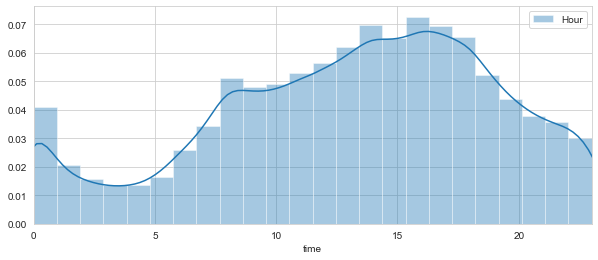

In [92]:
fig, ax = plt.subplots(figsize=(10,4))
plt.xlim(0, 23)

sns.distplot(df["time"], label="Hour", ax=ax, bins=24)

ax.legend()

* Max number of accidents around 2-7 pm.

## What street has the most accidents in NYC?

### Find out where most accidents happen with .idxmax() and .max()

In [93]:
max_crash = df["LOCATION"].value_counts().idxmax()
max_crash

'POINT (-73.91282 40.861862)'

In [94]:
max_count = df["LOCATION"].value_counts().max()
max_count

80

In [95]:
pinpoint_max = df[df["LOCATION"] == max_crash]
pinpoint_max_map = pinpoint_max[["LATITUDE","LONGITUDE"]]
pinpoint_max_map.head()

,LATITUDE,LONGITUDE
18,40.861862,-73.91282
663,40.861862,-73.91282
814,40.861862,-73.91282
937,40.861862,-73.91282
1359,40.861862,-73.91282


In [96]:
max_lat = pinpoint_max["LATITUDE"].mean()
max_lon = pinpoint_max["LONGITUDE"].mean()

In [97]:
hmap2 = folium.Map(location=[max_lat, max_lon],zoom_start=30)
hmap2.add_child(HeatMap(pinpoint_max_map, radius = 15))

hmap2

### Get street name

In [98]:
print(pinpoint_max['ON STREET NAME'].unique())

['WEST FORDHAM ROAD' 'MAJOR DEEGAN EXPRESSWAY']


### When do accidents tend to occur at this point?

In [100]:
pinpoint_max["time"] = pinpoint_max["CRASH TIME"].apply(lambda x: int(x[0:2]))
pinpoint_max["time"].value_counts()
pass

C:\Users\Ece\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


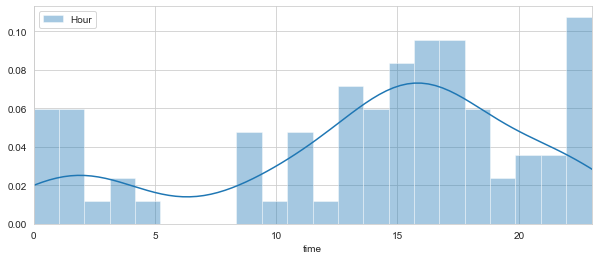

In [86]:
fig, ax = plt.subplots(figsize=(10,4))
plt.xlim(0, 23)

sns.distplot(pinpoint_max["time"], label="Hour", ax=ax, bins=22)

ax.legend()

* Max number of accidents around 4-5 pm and 11 pm.

## What street has the least accidents in NYC?

### Repeat the same for .idxmin() and .min()

In [33]:
min_crash = df["LOCATION"].value_counts().idxmin()
min_crash

'POINT (-73.901924 40.7622)'

In [34]:
min_count = df["LOCATION"].value_counts().min()
min_count

1

In [49]:
pinpoint_min = df[df["LOCATION"] == min_crash]
pinpoint_min_map = pinpoint_min[["LATITUDE","LONGITUDE"]]
pinpoint_min_map.head()

,LATITUDE,LONGITUDE
25457,40.7622,-73.901924


In [37]:
min_lat = pinpoint_min["LATITUDE"].mean()
min_lon = pinpoint_min["LONGITUDE"].mean()

In [38]:
hmap3 = folium.Map(location=[min_lat, min_lon],zoom_start=30)
hmap3.add_child(HeatMap(pinpoint_min_map, radius = 15))

hmap3

### Get street name

In [88]:
print(pinpoint_min['OFF STREET NAME'].unique())

['26-15 BROOKLYN QUEENS EXPRESSWAY']


In [101]:
pinpoint_min["time"] = pinpoint_min["CRASH TIME"].apply(lambda x: int(x[0:2]))
pinpoint_min["time"].value_counts()
pass

C:\Users\Ece\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


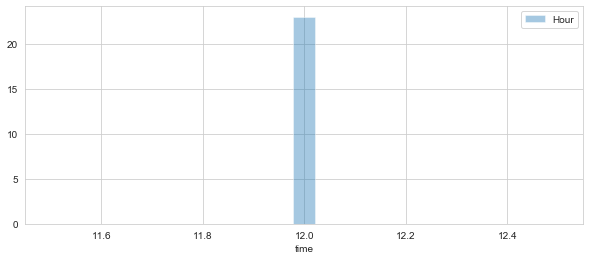

In [91]:
fig, ax = plt.subplots(figsize=(10,4))

sns.distplot(pinpoint_min["time"], label="Hour", ax=ax, bins=23)

ax.legend()

* Only accident occured at 12 pm.

## Injuries and casualties

In [136]:
ouch = df[["LATITUDE","LONGITUDE","NUMBER OF PERSONS INJURED","NUMBER OF PERSONS KILLED","NUMBER OF PEDESTRIANS INJURED","NUMBER OF PEDESTRIANS KILLED","NUMBER OF CYCLIST INJURED","NUMBER OF CYCLIST KILLED","NUMBER OF MOTORIST INJURED","NUMBER OF MOTORIST KILLED","ON STREET NAME","CROSS STREET NAME","OFF STREET NAME"]]
ouch.nunique()



LATITUDE                         29106
LONGITUDE                        23552
NUMBER OF PERSONS INJURED           12
NUMBER OF PERSONS KILLED             5
NUMBER OF PEDESTRIANS INJURED        6
NUMBER OF PEDESTRIANS KILLED         2
NUMBER OF CYCLIST INJURED            4
NUMBER OF CYCLIST KILLED             2
NUMBER OF MOTORIST INJURED          12
NUMBER OF MOTORIST KILLED            5
ON STREET NAME                    4009
CROSS STREET NAME                 4405
OFF STREET NAME                  17451
dtype: int64

### The most dangerous road for pedestrians

In [144]:
ped_inj = ouch["NUMBER OF PEDESTRIANS INJURED"].max()
ped_dead = ouch["NUMBER OF PEDESTRIANS KILLED"].max()

#### Injuries

In [145]:
ped_inj

6

In [143]:
max_ped = ouch[ouch["NUMBER OF PEDESTRIANS INJURED"] == ped_inj]
max_ped = ouch[["LATITUDE","LONGITUDE","ON STREET NAME","CROSS STREET NAME"]]
max_ped.head(1)

,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME
0,40.8921,-73.83376,PRATT AVENUE,STRANG AVENUE


#### Casualties

In [146]:
ped_dead

1

In [142]:
max_ped_gone = ouch[ouch["NUMBER OF PEDESTRIANS KILLED"] == ped_dead]
max_ped_gone = ouch[["LATITUDE","LONGITUDE","ON STREET NAME","CROSS STREET NAME"]]
max_ped_gone.head(1)

,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME
0,40.8921,-73.83376,PRATT AVENUE,STRANG AVENUE


* PRATT AVENUE & STRANG AVENUE: most dangerous area for pedestrians

### The most dangerous road for motorists

In [154]:
moto_inj = ouch["NUMBER OF MOTORIST INJURED"].max()
moto_dead = ouch["NUMBER OF MOTORIST KILLED"].max()

#### Injuries

In [155]:
moto_inj

15

In [156]:
max_moto = ouch[ouch["NUMBER OF MOTORIST INJURED"] == moto_inj]
max_moto = ouch[["LATITUDE","LONGITUDE","ON STREET NAME","CROSS STREET NAME"]]
max_moto.head(1)

,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME
0,40.8921,-73.83376,PRATT AVENUE,STRANG AVENUE


#### Casualties

In [157]:
moto_dead

4

In [158]:
max_moto = ouch[ouch["NUMBER OF MOTORIST KILLED"] == moto_dead]
max_moto = ouch[["LATITUDE","LONGITUDE","ON STREET NAME","CROSS STREET NAME"]]
max_moto.head(1)

,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME
0,40.8921,-73.83376,PRATT AVENUE,STRANG AVENUE


* PRATT AVENUE & STRANG AVENUE: most dangerous area for motorists